In [1]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
from transformers import AdamW, get_scheduler
from torch.utils.data import DataLoader, random_split
from src.dataset import TurtleSoupClassificationDataset
from src.utils import plot_training_validation_loss, plot_training_validation_acc
from run import train_classification_model

c:\Users\wei\Desktop\programs\deep learning\turtle-soup-lateral-thinking-game\model\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [4]:
model = BertForSequenceClassification.from_pretrained("bert-large-uncased", num_labels=3)
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
batch_size = 16
epochs = 20
learning_rate = 1e-5

template = "Based on the judgment rule, this player's guess is"
label_map = {
    "T": 0,
    "F": 1,
    "N": 2
}

In [3]:
train_data_path = "./data/en_train_8k.json"
test_data_path = "./data/en_test_1.5k.json"
prompt_path = "./prompts/prompt_en.json"

In [6]:
train_dataset = TurtleSoupClassificationDataset(train_data_path, prompt_path, tokenizer, max_length=512, template=template, label_map=label_map)
val_dataset = TurtleSoupClassificationDataset(test_data_path, prompt_path, tokenizer, max_length=512, template=template, label_map=label_map)

# 創建 DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [7]:
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
num_training_steps = len(train_dataloader) * epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

c:\Users\wei\Desktop\programs\deep learning\turtle-soup-lateral-thinking-game\model\venv\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [9]:
train_losses, train_accuracies, val_losses, val_accuracies = train_classification_model(
    model, train_dataloader, val_dataloader, optimizer, lr_scheduler, epochs, device=device
)

Epoch 1/20: 100%|██████████| 82/82 [00:28<00:00,  2.87it/s]


Epoch 1/20 | train_loss: 0.979, val_loss: 0.969, train_acc: 0.467, val_acc: 0.526


Epoch 2/20: 100%|██████████| 82/82 [00:28<00:00,  2.91it/s]


Epoch 2/20 | train_loss: 0.966, val_loss: 0.951, train_acc: 0.473, val_acc: 0.548


Epoch 3/20: 100%|██████████| 82/82 [00:28<00:00,  2.90it/s]


Epoch 3/20 | train_loss: 0.939, val_loss: 0.937, train_acc: 0.534, val_acc: 0.561


Epoch 4/20: 100%|██████████| 82/82 [00:28<00:00,  2.89it/s]


Epoch 4/20 | train_loss: 0.928, val_loss: 0.927, train_acc: 0.549, val_acc: 0.543


Epoch 5/20: 100%|██████████| 82/82 [00:28<00:00,  2.91it/s]


Epoch 5/20 | train_loss: 0.900, val_loss: 0.921, train_acc: 0.561, val_acc: 0.574


Epoch 6/20: 100%|██████████| 82/82 [00:28<00:00,  2.90it/s]


Epoch 6/20 | train_loss: 0.905, val_loss: 0.929, train_acc: 0.553, val_acc: 0.530


Epoch 7/20: 100%|██████████| 82/82 [00:28<00:00,  2.91it/s]


Epoch 7/20 | train_loss: 0.885, val_loss: 0.936, train_acc: 0.566, val_acc: 0.570


Epoch 8/20: 100%|██████████| 82/82 [00:28<00:00,  2.89it/s]


Epoch 8/20 | train_loss: 0.889, val_loss: 0.913, train_acc: 0.557, val_acc: 0.530


Epoch 9/20: 100%|██████████| 82/82 [00:28<00:00,  2.90it/s]


Epoch 9/20 | train_loss: 0.891, val_loss: 0.913, train_acc: 0.556, val_acc: 0.543


Epoch 10/20: 100%|██████████| 82/82 [00:28<00:00,  2.89it/s]


Epoch 10/20 | train_loss: 0.876, val_loss: 0.921, train_acc: 0.566, val_acc: 0.491


Epoch 11/20: 100%|██████████| 82/82 [00:28<00:00,  2.91it/s]


Epoch 11/20 | train_loss: 0.865, val_loss: 0.914, train_acc: 0.561, val_acc: 0.574


Epoch 12/20: 100%|██████████| 82/82 [00:28<00:00,  2.89it/s]


Epoch 12/20 | train_loss: 0.844, val_loss: 0.924, train_acc: 0.584, val_acc: 0.535


Epoch 13/20: 100%|██████████| 82/82 [00:28<00:00,  2.89it/s]


Epoch 13/20 | train_loss: 0.816, val_loss: 0.908, train_acc: 0.616, val_acc: 0.583


Epoch 14/20: 100%|██████████| 82/82 [00:28<00:00,  2.90it/s]


Epoch 14/20 | train_loss: 0.769, val_loss: 0.907, train_acc: 0.661, val_acc: 0.557


Epoch 15/20: 100%|██████████| 82/82 [00:28<00:00,  2.91it/s]


Epoch 15/20 | train_loss: 0.731, val_loss: 0.924, train_acc: 0.695, val_acc: 0.570


Epoch 16/20: 100%|██████████| 82/82 [00:28<00:00,  2.89it/s]


Epoch 16/20 | train_loss: 0.674, val_loss: 0.923, train_acc: 0.717, val_acc: 0.587


Epoch 17/20: 100%|██████████| 82/82 [00:28<00:00,  2.90it/s]


Epoch 17/20 | train_loss: 0.638, val_loss: 0.918, train_acc: 0.745, val_acc: 0.587


Epoch 18/20: 100%|██████████| 82/82 [00:28<00:00,  2.90it/s]


Epoch 18/20 | train_loss: 0.612, val_loss: 0.932, train_acc: 0.759, val_acc: 0.591


Epoch 19/20: 100%|██████████| 82/82 [00:28<00:00,  2.91it/s]


Epoch 19/20 | train_loss: 0.586, val_loss: 0.933, train_acc: 0.772, val_acc: 0.587


Epoch 20/20: 100%|██████████| 82/82 [00:28<00:00,  2.90it/s]


Epoch 20/20 | train_loss: 0.567, val_loss: 0.942, train_acc: 0.785, val_acc: 0.587


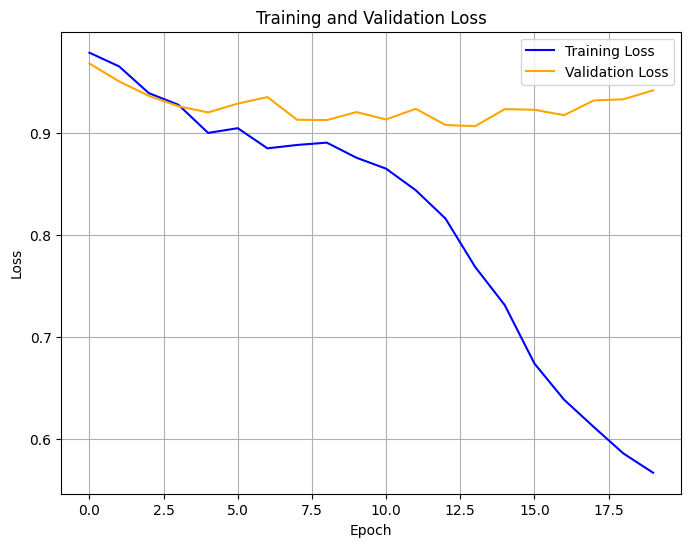

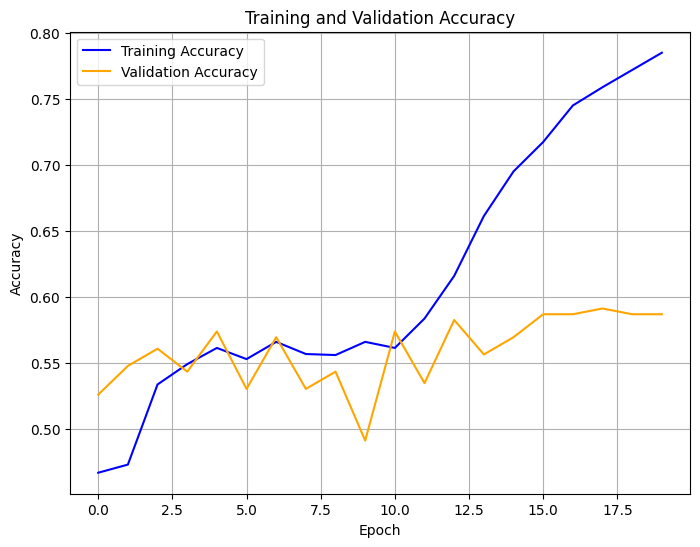

In [10]:
plot_training_validation_loss(train_losses, val_losses)
plot_training_validation_acc(train_accuracies, val_accuracies)

In [12]:
# model.save_pretrained("./params/bert-turtle-soup-classification-en")
# model.save_pretrained("./params/bert-turtle-soup-classification-en")